In [1]:
#%load_ext autoreload
#%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, Image as IPImage

from PIL import Image

from ipywidgets import interact, Dropdown

import cv2
from skimage import feature
from scipy.stats import skew, kurtosis
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.decomposition import PCA
import numpy as np

from sklearn.feature_selection import VarianceThreshold

from MirrorExtractor.mirror_extractor import MirrorExtractor

In [2]:
def show_image(image_path):
    img = Image.open(image_path)
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_path.split('/')[-1])
    plt.show()



In [11]:
! ls ../../data/webcam_useful_image/webcam_useful_images/image_2023-01-01_1200.jpg


../../data/webcam_useful_image/webcam_useful_images/image_2023-01-01_1200.jpg


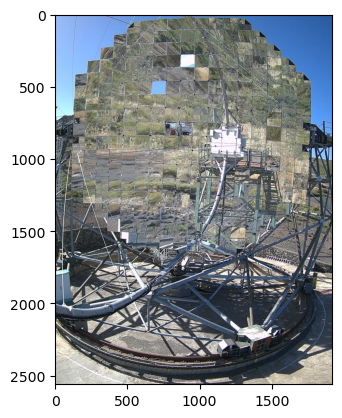

In [5]:
img_path = "../../data/webcam_useful_image/webcam_useful_images/image_2023-01-01_1200.jpg"
img_path_adata = "/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/08/15/IRCamM1T20250815_095000M.jpg"
img = np.array(Image.open(img_path_adata).convert('RGB'))
plt.imshow(img)

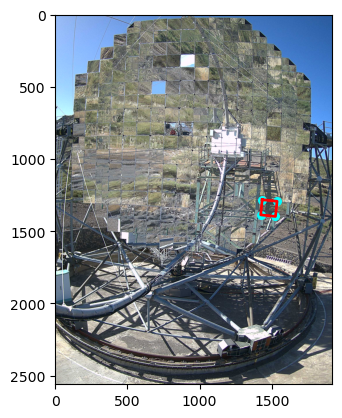

In [77]:
x_coords, y_coords = extractor.get_coords(235)

fig, ax1 = plt.subplots()
ax1.plot(x_coords, y_coords, 'r-', lw=2)
ax1.scatter(x_coords[:-1], y_coords[:-1], c='cyan', s=30)
ax1.imshow(img)

In [7]:
def extract_one_mirror_from_images(img_path_list, mirror_id, extractor):
    mirror_list = []
    for path in img_path_list:
        print(path)
        img = np.array(Image.open(path).convert('RGB'))
        x_coords, y_coords = extractor.get_coords(mirror_id)
        cropped = extractor.extract_polygon_region_cv2(img, x_coords, y_coords)
        mirror_list.append(cropped)
    return mirror_list

In [51]:
img_list = glob.glob("../data/webcam_useful_image/webcam_useful_images/*.jpg")
img_list = glob.glob("/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T*1[7-9]*.jpg")
img_list[:]

['/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_173000M.jpg',
 '/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_170000M.jpg',
 '/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_171000M.jpg',
 '/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_172000M.jpg',
 '/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_174000M.jpg',
 '/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_175000M.jpg',
 '/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_180000M.jpg',
 '/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_181000M.jpg',
 '/media/pgliwny/ADATA HD3303/Co

In [43]:
# Create interactive dropdown
interact(
    show_image,
    image_path=Dropdown(
        options=img_list[:],
        description='Select:'
    )
)

interactive(children=(Dropdown(description='Select:', options=('/media/pgliwny/ADATA HD3303/Computer_Vision_sy…

<function __main__.show_image(image_path)>

/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_173000M.jpg
/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_170000M.jpg
/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_171000M.jpg
/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_172000M.jpg
/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_174000M.jpg
/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_175000M.jpg
/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_180000M.jpg
/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T20250705_181000M.jpg
/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IR

IndexError: list index out of range

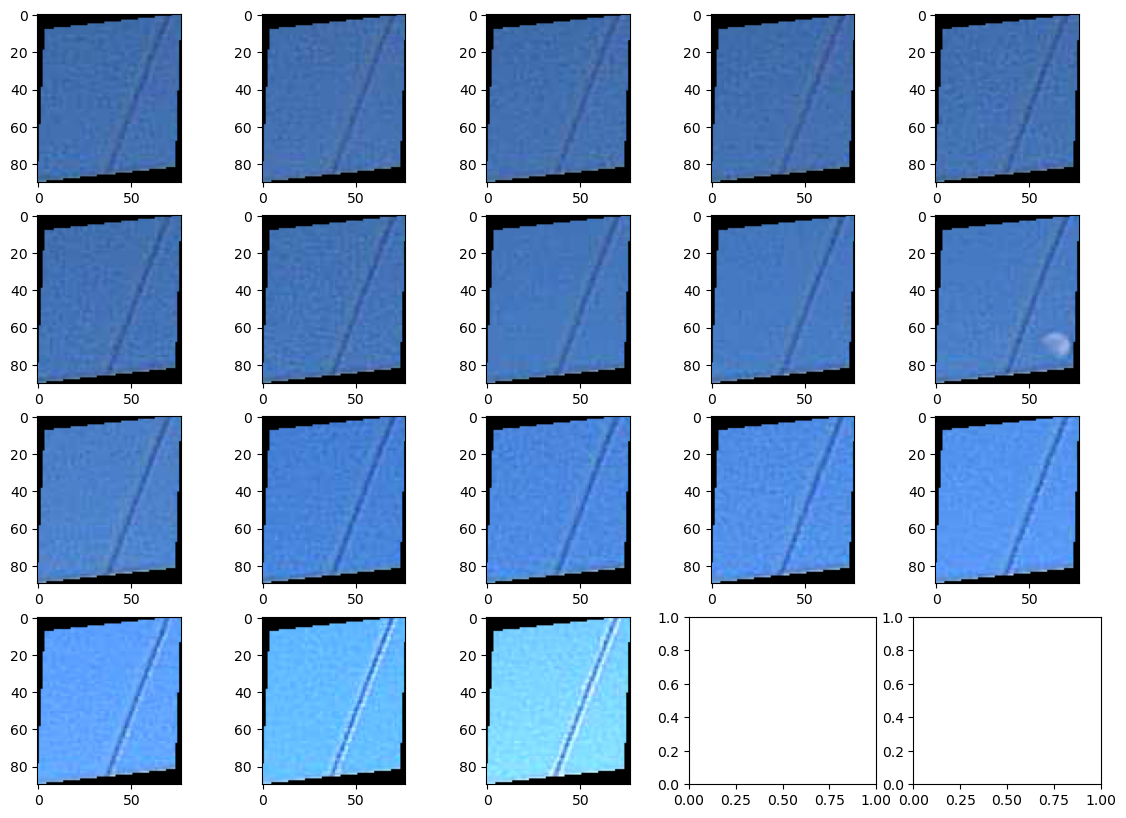

In [81]:
extractor = MirrorExtractor("/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/crossings_points_IRCamM1T20250702_161000M.pkl")
# extractor = MirrorExtractor("../data/crossings_points.pkl")

mirror_list = extract_one_mirror_from_images(img_list[:], 35, extractor)

fig, ax = plt.subplots(4, 5, figsize=(14, 10))
axes = ax.flatten()
for i in range(20):
    axes[i].imshow(mirror_list[i])

plt.tight_layout()

In [70]:
mirror_list[2].shape

(110, 106, 3)

In [71]:
path_list = [path.split("/")[-1] for path in img_list]

In [72]:
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def compute_mirror_features(mirror_list):
    """
    Oblicza cechy dla każdego lustra
    """
    features = []
    
    for mirror in mirror_list:
        feature_dict = {}
        
        # 1. Statystyki podstawowe dla każdego kanału RGB
        for i, color in enumerate(['R', 'G', 'B']):
            feature_dict[f'{color}_mean'] = np.mean(mirror[:, :, i])
            feature_dict[f'{color}_std'] = np.std(mirror[:, :, i])
            feature_dict[f'{color}_median'] = np.median(mirror[:, :, i])
            feature_dict[f'{color}_min'] = np.min(mirror[:, :, i])
            feature_dict[f'{color}_max'] = np.max(mirror[:, :, i])
        
        # 2. Jasność ogólna
        feature_dict['brightness'] = np.mean(mirror)
        feature_dict['brightness_std'] = np.std(mirror)
        
        # 3. Kontrast
        feature_dict['contrast'] = np.std(mirror)
        
        # 4. Entropia (miara "chaotyczności")
        hist, _ = np.histogram(mirror.flatten(), bins=256, range=(0, 256))
        hist = hist / hist.sum()
        hist = hist[hist > 0]
        feature_dict['entropy'] = -np.sum(hist * np.log2(hist))
        
        # 5. Dominujący kolor (RGB)
        feature_dict['dominant_R'] = np.percentile(mirror[:, :, 0], 75)
        feature_dict['dominant_G'] = np.percentile(mirror[:, :, 1], 75)
        feature_dict['dominant_B'] = np.percentile(mirror[:, :, 2], 75)
        
        # 6. Gradient (wykrywa krawędzie/wzory)
        gray = np.mean(mirror, axis=2)
        gradient_x = np.gradient(gray, axis=1)
        gradient_y = np.gradient(gray, axis=0)
        feature_dict['gradient_magnitude'] = np.mean(np.sqrt(gradient_x**2 + gradient_y**2))
        
        # 7. Liczba pikseli bardzo jasnych i bardzo ciemnych
        feature_dict['very_bright_ratio'] = np.sum(mirror > 200) / mirror.size
        feature_dict['very_dark_ratio'] = np.sum(mirror < 50) / mirror.size
        
        features.append(feature_dict)
    
    return features





In [82]:
mirror_features = compute_mirror_features(mirror_list)
df_mirror_features = pd.DataFrame(mirror_features)
df_mirror_features["name"] = path_list[:]
df_mirror_features.head()

In [83]:
df_mirror_features = pd.DataFrame(mirror_features)
df_mirror_features["name"] = path_list[:]
df_mirror_features.head()

,R_mean,R_std,R_median,R_min,R_max,G_mean,G_std,G_median,G_min,G_max,...,brightness_std,contrast,entropy,dominant_R,dominant_G,dominant_B,gradient_magnitude,very_bright_ratio,very_dark_ratio,name
0,57.029582,23.173363,65.0,0,109,95.122511,37.864437,109.0,0,141,...,57.296976,57.296976,5.944730,68.0,113.0,177.0,8.288989,0.000144,0.136652,IRCamM1T20250705_173000M.jpg
1,59.694949,24.151957,68.0,0,108,96.700722,38.437587,111.0,0,142,...,57.428329,57.428329,5.887500,71.0,114.0,179.0,8.197061,0.000000,0.134969,IRCamM1T20250705_170000M.jpg
2,58.178211,23.593867,66.0,0,118,95.949062,38.159449,110.0,0,144,...,57.411903,57.411903,5.882060,69.0,114.0,178.0,8.226523,0.000000,0.135354,IRCamM1T20250705_171000M.jpg
3,57.837085,23.416626,66.0,0,113,95.454834,37.961605,110.0,0,142,...,57.351257,57.351257,5.861155,69.0,113.0,178.0,8.057981,0.000337,0.135209,IRCamM1T20250705_172000M.jpg
4,58.600866,23.865974,66.0,0,115,97.077489,38.689819,112.0,0,137,...,58.336220,58.336220,6.002237,70.0,115.0,180.0,8.800513,0.000529,0.136508,IRCamM1T20250705_174000M.jpg


In [84]:
df_mirror_features.keys()

Index(['R_mean', 'R_std', 'R_median', 'R_min', 'R_max', 'G_mean', 'G_std',
       'G_median', 'G_min', 'G_max', 'B_mean', 'B_std', 'B_median', 'B_min',
       'B_max', 'brightness', 'brightness_std', 'contrast', 'entropy',
       'dominant_R', 'dominant_G', 'dominant_B', 'gradient_magnitude',
       'very_bright_ratio', 'very_dark_ratio', 'name'],
      dtype='object')

In [85]:
df_mirror_features.describe()

,R_mean,R_std,R_median,R_min,R_max,G_mean,G_std,G_median,G_min,G_max,...,brightness,brightness_std,contrast,entropy,dominant_R,dominant_G,dominant_B,gradient_magnitude,very_bright_ratio,very_dark_ratio
count,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,67.757111,27.856730,76.666667,0.0,144.444444,115.561937,46.137657,132.944444,0.0,174.833333,...,120.021250,68.012718,68.012718,5.886732,80.722222,136.833333,208.166667,9.817336,0.140385,0.136217
std,14.314712,6.144150,15.811388,0.0,31.732748,25.359823,10.266073,29.292585,0.0,37.380791,...,21.333001,10.406966,10.406966,0.334846,16.774650,29.998529,29.927854,1.793406,0.166889,0.001084
min,57.029582,23.173363,65.000000,0.0,108.000000,95.122511,37.864437,109.000000,0.0,137.000000,...,100.639202,57.296976,57.296976,5.101395,68.000000,113.000000,177.000000,7.954252,0.000000,0.134343
25%,58.752814,23.940882,67.000000,0.0,118.750000,97.401082,38.817907,112.250000,0.0,144.000000,...,103.122367,58.656668,58.656668,5.821605,70.250000,115.500000,181.000000,8.292940,0.000697,0.135498
50%,61.459957,25.199022,70.000000,0.0,138.000000,106.320924,42.479962,122.000000,0.0,165.500000,...,112.268543,64.420126,64.420126,5.973483,73.500000,125.500000,197.500000,9.183981,0.040067,0.136508
75%,69.823557,28.895017,79.000000,0.0,163.250000,122.204762,48.874955,140.500000,0.0,191.000000,...,129.874952,76.681423,76.681423,6.065158,84.500000,145.250000,234.000000,11.013492,0.278331,0.136724
max,112.449206,46.755155,126.000000,0.0,221.000000,186.036797,74.670470,214.000000,0.0,255.000000,...,172.667436,85.221364,85.221364,6.333831,133.000000,221.000000,255.000000,14.067733,0.556854,0.139105


In [86]:
corr = df_mirror_features[['R_mean', 'R_std', 'R_median', 'G_mean', 'G_std',
       'G_median', 'B_mean', 'B_std', 'B_median', 
        'brightness', 'brightness_std', 'contrast', 'entropy',
       'dominant_R', 'dominant_G', 'dominant_B', 'gradient_magnitude',
       'very_bright_ratio', 'very_dark_ratio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,R_mean,R_std,R_median,G_mean,G_std,G_median,B_mean,B_std,B_median,brightness,brightness_std,contrast,entropy,dominant_R,dominant_G,dominant_B,gradient_magnitude,very_bright_ratio,very_dark_ratio
R_mean,1.000000,0.998836,0.999248,0.984868,0.984727,0.984309,0.851282,0.847136,0.852275,0.962465,0.834987,0.834987,-0.687842,0.999309,0.985693,0.836849,0.918792,0.883896,-0.408141
R_std,0.998836,1.000000,0.996670,0.987587,0.987772,0.986788,0.858503,0.854469,0.859257,0.966238,0.843159,0.843159,-0.681069,0.997857,0.988219,0.844161,0.925266,0.886330,-0.387526
R_median,0.999248,0.996670,1.000000,0.984175,0.983795,0.983744,0.854879,0.850803,0.855892,0.963494,0.838577,0.838577,-0.682656,0.999205,0.985067,0.840956,0.919781,0.889350,-0.406630
G_mean,0.984868,0.987587,0.984175,1.000000,0.999969,0.999929,0.908653,0.904895,0.909091,0.988565,0.898484,0.898484,-0.670590,0.984606,0.999882,0.895842,0.950873,0.912423,-0.300794
G_std,0.984727,0.987772,0.983795,0.999969,1.000000,0.999841,0.908599,0.904858,0.909000,0.988499,0.898522,0.898522,-0.668823,0.984468,0.999864,0.895791,0.951747,0.912674,-0.297794
G_median,0.984309,0.986788,0.983744,0.999929,0.999841,1.000000,0.908948,0.905164,0.909423,0.988532,0.898739,0.898739,-0.673834,0.984004,0.999755,0.896055,0.949828,0.911110,-0.303487
B_mean,0.851282,0.858503,0.854879,0.908653,0.908599,0.908948,1.000000,0.999945,0.999754,0.959889,0.999029,0.999029,-0.429581,0.859397,0.906590,0.999368,0.945388,0.929837,-0.038115
B_std,0.847136,0.854469,0.850803,0.904895,0.904858,0.905164,0.999945,1.000000,0.999619,0.957450,0.999160,0.999160,-0.420757,0.855507,0.902833,0.999642,0.944075,0.929366,-0.031453
B_median,0.852275,0.859257,0.855892,0.909091,0.909000,0.909423,0.999754,0.999619,1.000000,0.960184,0.998442,0.998442,-0.440404,0.860147,0.906973,0.998829,0.943409,0.926718,-0.041851
brightness,0.962465,0.966238,0.963494,0.988565,0.988499,0.988532,0.959889,0.957450,0.960184,1.000000,0.951817,0.951817,-0.595455,0.965528,0.987858,0.951326,0.969359,0.939951,-0.226085


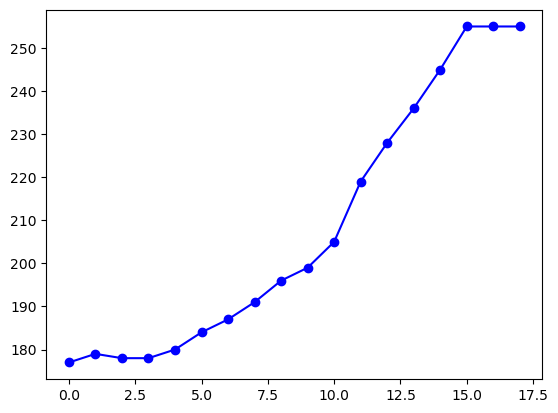

In [87]:
features_list = ["entropy", "dominant_B"]
plt.plot(df_mirror_features["dominant_B"], 'bo-')

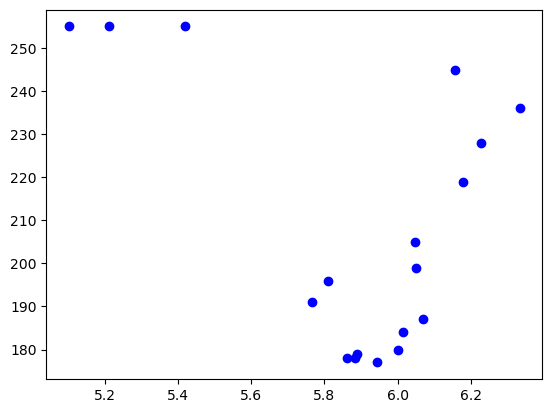

In [88]:
plt.plot(df_mirror_features["entropy"], df_mirror_features["dominant_B"], 'bo')

In [24]:
df_mirror_features.iloc[5]

R_mean                                   55.372222
R_std                                    32.100778
R_median                                      53.0
R_min                                            0
R_max                                          255
G_mean                                   55.372222
G_std                                    32.100778
G_median                                      53.0
G_min                                            0
G_max                                          255
B_mean                                   55.372222
B_std                                    32.100778
B_median                                      53.0
B_min                                            0
B_max                                          255
brightness                               55.372222
brightness_std                           32.100778
contrast                                 32.100778
entropy                                   6.449663
dominant_R                     

In [13]:
mirror_features[0]

{'R_mean': np.float64(83.28308823529412),
 'R_std': np.float64(40.35618994569967),
 'R_median': np.float64(89.0),
 'R_min': np.uint8(0),
 'R_max': np.uint8(240),
 'G_mean': np.float64(84.03308823529412),
 'G_std': np.float64(40.67268478379103),
 'G_median': np.float64(90.0),
 'G_min': np.uint8(0),
 'G_max': np.uint8(240),
 'B_mean': np.float64(73.9375),
 'B_std': np.float64(37.872169739913545),
 'B_median': np.float64(79.0),
 'B_min': np.uint8(0),
 'B_max': np.uint8(232),
 'brightness': np.float64(80.41789215686275),
 'brightness_std': np.float64(39.91852146988051),
 'contrast': np.float64(39.91852146988051),
 'entropy': np.float64(5.981538934906864),
 'dominant_R': np.float64(104.0),
 'dominant_G': np.float64(104.0),
 'dominant_B': np.float64(92.25),
 'gradient_magnitude': np.float64(32.15992544334488),
 'very_bright_ratio': np.float64(0.00980392156862745),
 'very_dark_ratio': np.float64(0.14460784313725492)}

In [33]:
features_names = list(mirror_features[0].keys())
X = np.array([[f[name] for name in features_names] for f in mirror_features])

# Usuń NaN i Inf
X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
results = {}
selector = VarianceThreshold(threshold=0.1)
X_high_var = selector.fit_transform(X_scaled)
high_var_features = [features_names[i] for i in selector.get_support(indices=True)]
        
results['variance'] = {
        'features': high_var_features,
        'n_features': len(high_var_features),
        'X': X_high_var
        }
print(f"Cechy o wysokiej wariancji: {len(high_var_features)}")

Cechy o wysokiej wariancji: 22


In [17]:
X.shape

(20, 25)

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

outlier_scores = np.zeros(len(mirror_list))

In [50]:
z_scores = np.abs(stats.zscore(X_scaled, axis=0))
outlier_scores = np.mean(z_scores, axis=1)
outliers = outlier_scores > 2
outliers

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [20]:
X[:, 2]

array([ 89. , 103. , 108.5, 127. , 109. , 150. , 126. ,  82. , 121. ,
       108.5, 107. , 112. , 112. , 109. , 122. , 127. , 110.5, 108. ,
        97. , 104. ])

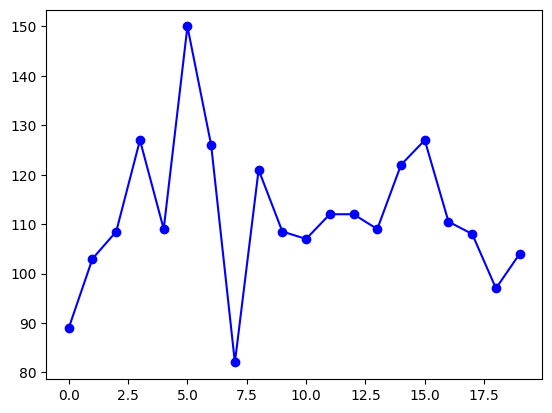

In [21]:
plt.plot(X[:, 2], 'bo-')

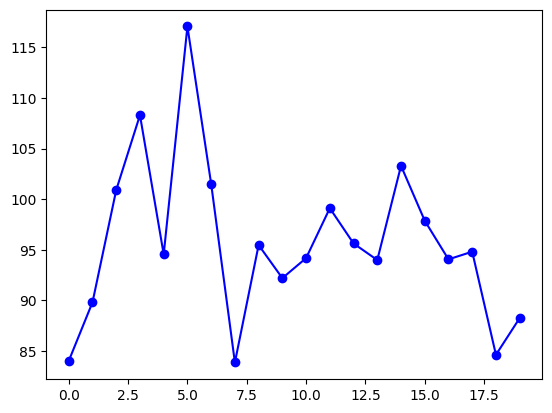

In [23]:
plt.plot(X[:, 5], 'bo-')


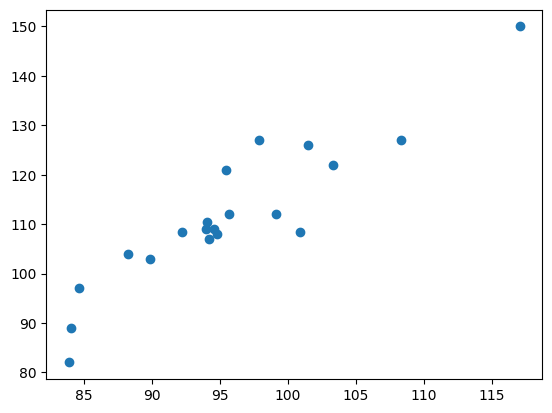

In [24]:
plt.scatter(X[:, 5], X[:, 2])


# Adwanced features

In [ ]:
def get_rgb_features(mirror_list):
    feat = {}
    for mirror in mirror_list:
        # Normalizowane proporcje RGB (suma = 1)
        mean_rgb = np.mean(mirror, axis=(0, 1))
        rgb_sum = np.sum(mean_rgb)
        if rgb_sum > 0:
            feat['r_ratio'] = mean_rgb[0] / rgb_sum
            feat['g_ratio'] = mean_rgb[1] / rgb_sum
            feat['b_ratio'] = mean_rgb[2] / rgb_sum
        
        # Stosunek kolorów (niezależny od jasności)
        feat['rg_ratio'] = mean_rgb[0] / (mean_rgb[1] + 1e-6)
        feat['rb_ratio'] = mean_rgb[0] / (mean_rgb[2] + 1e-6)
        feat['gb_ratio'] = mean_rgb[1] / (mean_rgb[2] + 1e-6)

    return feat